# ISIS Synchrotron: Tune from single particle tracking
## Using cpymad

#### Regular imports

In [1]:
import os
import numpy as np
import pandas as pnd

### Import MADX from CPYMAD

**cpymad is a Cython binding to MAD-X for giving full control and access to a MAD-X interpreter in python.**
https://pypi.org/project/cpymad/

Installed (on linux) like:
`pip install cpymad`  or  `pip3 install cpymad`


Python 3 version of the metaclass by the OMC team:
`pip install tfs-pandas`

In [2]:
from cpymad.madx import Madx
import tfs

#### Import helper functions

In [3]:
if os.name=='nt': # Windows
    %run ../../Scripts/helper_functions.py
    %run ../../Scripts/cpymad_helpers.py
else: # Linux    
    %run '../../Scripts/helper_functions.py'
    %run '../../Scripts/cpymad_helpers.py'

#### Note to find our MAD-X beam input parameters we can use a helper class `MADX_Proton_Beam_Parameters`

In [4]:
testbeam = MADX_Proton_Beam_Parameters(800*1E6)

In [5]:
testbeam.print_beam()

M_proton =  938.0 MeV
Energy =  0.8 GeV
Total Energy =  1.74 GeV
Gamma =  1.85
Beta =  0.842
Momentum =  1.463296 GeV/c


#### Standard matplotlib plot parameters

In [6]:
plt.rcParams['figure.figsize'] = [8.0, 5.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 8

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5

#### Create Plot folder

In [7]:
save_folder = 'Plots/'
make_directory(save_folder)
#legend_label = 'Case'
main_label = 'ISIS_I'
output_line = 0

Successfully created the directory Plots/


## Run whole script

In [8]:
cpymad_logfile = './cpymad_logfile.log'
madx = cpymad_start(cpymad_logfile)

madx.call(file='00_Lattice_Files/isis_injection.beam')
madx.call(file='00_Lattice_Files/isis_run_injection.madx')  
madx.call(file='00_Lattice_Files/isis_synchrotron.seq')    

In [9]:
output_line = cpymad_print_output(cpymad_logfile)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.10.06 11:49:46      +
  ++++++++++++++++++++++++++++++++++++++++++++
beam, particle = proton, pc = 0.37033168;

!CALL, FILE = "isis_injection.beam";

//lat3ud file in madx format



//basic lattice below.



kqtd = .00610063;    // nominal numbers for 4.31 and 3.83 lattice

kqtf = -.01155444;



! Amplitude and Harmonic for QTD

a1:=0.000;

b1:=0.000;

hn1:=7;



! Amplitude and Harmonic for QTF

a2:=0.000;

b2:=0.000;

hn2:=8;



HER0qtd:=(a1*cos(hn1*(0/10)*2*PI))+(b1*sin(hn1*(0/10)*2*PI));

HER1qtd:=(a1*cos(hn1*(1/10)*2*PI))+(b1*sin(hn1*(1/10)*2*PI));

HER2qtd:=(a1*cos(hn1*(2/10)*2*PI))+(b1*sin(hn1*(2/10)*2*PI));

HER3qtd:=(a1*cos(hn1*(3/10)*2*PI))+(b1*sin(hn1*(3/10)*2*PI));

HER4qtd:=(a1*cos(hn1*(4/10)*2*PI))+(b1*sin(hn1*(4/10)*2*PI));

HER5qtd:=(a1*cos(hn1*(5/10)*2*PI))+(

In [10]:
madx.use(sequence='synchrotron')

In [11]:
output_line = cpymad_print_output(cpymad_logfile)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.10.06 11:49:46      +
  ++++++++++++++++++++++++++++++++++++++++++++
beam, particle = proton, pc = 0.37033168;

!CALL, FILE = "isis_injection.beam";

//lat3ud file in madx format



//basic lattice below.



kqtd = .00610063;    // nominal numbers for 4.31 and 3.83 lattice

kqtf = -.01155444;



! Amplitude and Harmonic for QTD

a1:=0.000;

b1:=0.000;

hn1:=7;



! Amplitude and Harmonic for QTF

a2:=0.000;

b2:=0.000;

hn2:=8;



HER0qtd:=(a1*cos(hn1*(0/10)*2*PI))+(b1*sin(hn1*(0/10)*2*PI));

HER1qtd:=(a1*cos(hn1*(1/10)*2*PI))+(b1*sin(hn1*(1/10)*2*PI));

HER2qtd:=(a1*cos(hn1*(2/10)*2*PI))+(b1*sin(hn1*(2/10)*2*PI));

HER3qtd:=(a1*cos(hn1*(3/10)*2*PI))+(b1*sin(hn1*(3/10)*2*PI));

HER4qtd:=(a1*cos(hn1*(4/10)*2*PI))+(b1*sin(hn1*(4/10)*2*PI));

HER5qtd:=(a1*cos(hn1*(5/10)*2*PI))+(

## MAD-X Twiss

Note that we can also use:

`madx.twiss(sequence='synchrotron', file='isis_twiss.tfs', columns=['keyword', 'name', 's', ...]`

In [12]:
madx.input('SELECT,flag=TWISS,COLUMN=keyword, name, s, betx, alfx, mux, bety, alfy, muy, x, px, y, py, t, pt, dx, dpx, dy, dpy, wx, phix, dmux, wy, phiy, dmuy, ddx, ddpx, ddy, ddpy, r11, r12, r21, r22, energy, l, angle, k0l, k0sl, k1l, k1sl, k2l, k2sl, k3l, k3sl, k4l, k4sl, k5l, k5sl, k6l, k6sl, k7l, k7sl, k8l, k8sl, k9l, k9sl, k10l, k10sl, ksi, hkick, vkick, tilt, e1, e2, h1, h2, hgap, fint, fintx, volt, lag, freq, harmon, slot_id, assembly_id, mech_sep, kmax, kmin, calib, polarity, alfa, beta11, beta12, beta13, beta21, beta22, beta23, beta31, beta32, beta33, alfa11, alfa12, alfa13, alfa21, alfa22, disp1, disp2, disp3, disp4')
madx_twiss = madx.twiss(sequence='synchrotron', file='isis_twiss.tfs')

## PTC Twiss

In [13]:
madx.input('ptc_create_universe')
madx.input('ptc_create_layout, time=false,model=2, method=6, nst=5, exact=true')
madx.input('ptc_twiss, closed_orbit, icase=56, no=4, slice_magnets')
madx.input('ptc_end')

True

In [14]:
ptc_twiss_summary = madx.table['ptc_twiss_summary']
for k in ptc_twiss_summary.keys():
    if ptc_twiss_summary[k][0] > 0:
        print(k + ' = ' + str(ptc_twiss_summary[k][0]))

length = 163.36281999999764
alpha_c = 0.03891361505492863
alpha_c_p = 0.4113725823388982
alpha_c_p3 = 30.929279773792445
gamma_tr = 5.069314209679108
q1 = 0.31010672015028995
q2 = 0.829998069157744
beta_x_min = 2.145653693097721
beta_x_max = 18.016638365443647
beta_y_min = 3.9953648849730206
beta_y_max = 16.765080086070597
beta11min = 2.145653693097721
beta11max = 18.016638365443647
beta22min = 3.9953648849730206
beta22max = 16.765080086070597
disp1max = 3.2539588866724203
disp2max = 1.072902931392462
orbit_x = 1.4774756745618788e-13
orbit_px = 2.771691258740786e-14
xcorms = 8.832311264049368e-14
pxcorms = 3.3909234383156504e-14
tcorms = 8.705397140154536e-14
xcomax = 1.7053025658242404e-13
pxcomax = 5.6001669125433015e-14
tcomax = 3.0808688933348094e-15
pxcomin = 1.9738898803021375e-15


In [15]:
ptc_twiss = madx.table['ptc_twiss']
list(ptc_twiss)

['name',
 'keyword',
 's',
 'betx',
 'alfx',
 'mux',
 'bety',
 'alfy',
 'muy',
 'x',
 'px',
 'y',
 'py',
 't',
 'pt',
 'dx',
 'dpx',
 'dy',
 'dpy',
 'wx',
 'phix',
 'dmux',
 'wy',
 'phiy',
 'dmuy',
 'ddx',
 'ddpx',
 'ddy',
 'ddpy',
 'r11',
 'r12',
 'r21',
 'r22',
 'energy',
 'l',
 'angle',
 'k0l',
 'k0sl',
 'k1l',
 'k1sl',
 'k2l',
 'k2sl',
 'k3l',
 'k3sl',
 'k4l',
 'k4sl',
 'k5l',
 'k5sl',
 'k6l',
 'k6sl',
 'k7l',
 'k7sl',
 'k8l',
 'k8sl',
 'k9l',
 'k9sl',
 'k10l',
 'k10sl',
 'k11l',
 'k11sl',
 'k12l',
 'k12sl',
 'k13l',
 'k13sl',
 'k14l',
 'k14sl',
 'k15l',
 'k15sl',
 'k16l',
 'k16sl',
 'k17l',
 'k17sl',
 'k18l',
 'k18sl',
 'k19l',
 'k19sl',
 'k20l',
 'k20sl',
 'ksi',
 'hkick',
 'vkick',
 'tilt',
 'e1',
 'e2',
 'h1',
 'h2',
 'hgap',
 'fint',
 'fintx',
 'volt',
 'lag',
 'freq',
 'harmon',
 'slot_id',
 'assembly_id',
 'mech_sep',
 'v_pos',
 'bbcharge',
 'xma',
 'yma',
 'sigx',
 'sigy',
 'lrad',
 'parent',
 'comments',
 're11',
 're12',
 're13',
 're14',
 're15',
 're16',
 're21',
 're22

#### the twiss object now contains the full TFS table information for each element in the lattice
The keywords available are:

In [16]:
list(madx_twiss)

['name',
 'keyword',
 's',
 'betx',
 'alfx',
 'mux',
 'bety',
 'alfy',
 'muy',
 'x',
 'px',
 'y',
 'py',
 't',
 'pt',
 'dx',
 'dpx',
 'dy',
 'dpy',
 'wx',
 'phix',
 'dmux',
 'wy',
 'phiy',
 'dmuy',
 'ddx',
 'ddpx',
 'ddy',
 'ddpy',
 'r11',
 'r12',
 'r21',
 'r22',
 'energy',
 'l',
 'angle',
 'k0l',
 'k0sl',
 'k1l',
 'k1sl',
 'k2l',
 'k2sl',
 'k3l',
 'k3sl',
 'k4l',
 'k4sl',
 'k5l',
 'k5sl',
 'k6l',
 'k6sl',
 'k7l',
 'k7sl',
 'k8l',
 'k8sl',
 'k9l',
 'k9sl',
 'k10l',
 'k10sl',
 'k11l',
 'k11sl',
 'k12l',
 'k12sl',
 'k13l',
 'k13sl',
 'k14l',
 'k14sl',
 'k15l',
 'k15sl',
 'k16l',
 'k16sl',
 'k17l',
 'k17sl',
 'k18l',
 'k18sl',
 'k19l',
 'k19sl',
 'k20l',
 'k20sl',
 'ksi',
 'hkick',
 'vkick',
 'tilt',
 'e1',
 'e2',
 'h1',
 'h2',
 'hgap',
 'fint',
 'fintx',
 'volt',
 'lag',
 'freq',
 'harmon',
 'slot_id',
 'assembly_id',
 'mech_sep',
 'v_pos',
 'bbcharge',
 'xma',
 'yma',
 'sigx',
 'sigy',
 'lrad',
 'parent',
 'comments',
 're11',
 're12',
 're13',
 're14',
 're15',
 're16',
 're21',
 're22

In [17]:
list(ptc_twiss)

['name',
 'keyword',
 's',
 'betx',
 'alfx',
 'mux',
 'bety',
 'alfy',
 'muy',
 'x',
 'px',
 'y',
 'py',
 't',
 'pt',
 'dx',
 'dpx',
 'dy',
 'dpy',
 'wx',
 'phix',
 'dmux',
 'wy',
 'phiy',
 'dmuy',
 'ddx',
 'ddpx',
 'ddy',
 'ddpy',
 'r11',
 'r12',
 'r21',
 'r22',
 'energy',
 'l',
 'angle',
 'k0l',
 'k0sl',
 'k1l',
 'k1sl',
 'k2l',
 'k2sl',
 'k3l',
 'k3sl',
 'k4l',
 'k4sl',
 'k5l',
 'k5sl',
 'k6l',
 'k6sl',
 'k7l',
 'k7sl',
 'k8l',
 'k8sl',
 'k9l',
 'k9sl',
 'k10l',
 'k10sl',
 'k11l',
 'k11sl',
 'k12l',
 'k12sl',
 'k13l',
 'k13sl',
 'k14l',
 'k14sl',
 'k15l',
 'k15sl',
 'k16l',
 'k16sl',
 'k17l',
 'k17sl',
 'k18l',
 'k18sl',
 'k19l',
 'k19sl',
 'k20l',
 'k20sl',
 'ksi',
 'hkick',
 'vkick',
 'tilt',
 'e1',
 'e2',
 'h1',
 'h2',
 'hgap',
 'fint',
 'fintx',
 'volt',
 'lag',
 'freq',
 'harmon',
 'slot_id',
 'assembly_id',
 'mech_sep',
 'v_pos',
 'bbcharge',
 'xma',
 'yma',
 'sigx',
 'sigy',
 'lrad',
 'parent',
 'comments',
 're11',
 're12',
 're13',
 're14',
 're15',
 're16',
 're21',
 're22

### Check output PTC Twiss TFS table to read relativistic gamma for plot normalisation

In [18]:
ptc_twiss_file = 'isis_twiss.tfs'

ptc_twiss_read = tfs.read(ptc_twiss_file)
ptc_twiss_read_Header = dict(ptc_twiss_read.headers)

In [19]:
gamma_rel = ptc_twiss_read_Header['GAMMA']
beta_rel = LorentzBeta(gamma_rel)
p_mass_GeV = 0.93827208816 #Proton mass GeV
tot_energy = gamma_rel * p_mass_GeV
kin_energy = tot_energy - p_mass_GeV
momentum = ptc_twiss_read_Header['PC']

print('Relativistic Gamma = ', round(gamma_rel,3))
print('Relativistic Beta = ', round(beta_rel,3))
print('Total Energy = ', round(tot_energy,4), 'GeV')
print('Kinetic Energy = ', round(kin_energy*1E3,3), 'MeV')
print('momentum = ', round(momentum,3), 'GeV/c')

Relativistic Gamma =  1.075
Relativistic Beta =  0.367
Total Energy =  1.0087 GeV
Kinetic Energy =  70.44 MeV
momentum =  0.37 GeV/c


### Now we can plot the TWISS

Sequence synchrotron exists in this instance of MAD-X
Active sequence:

{'synchrotron': <Sequence: synchrotron>}


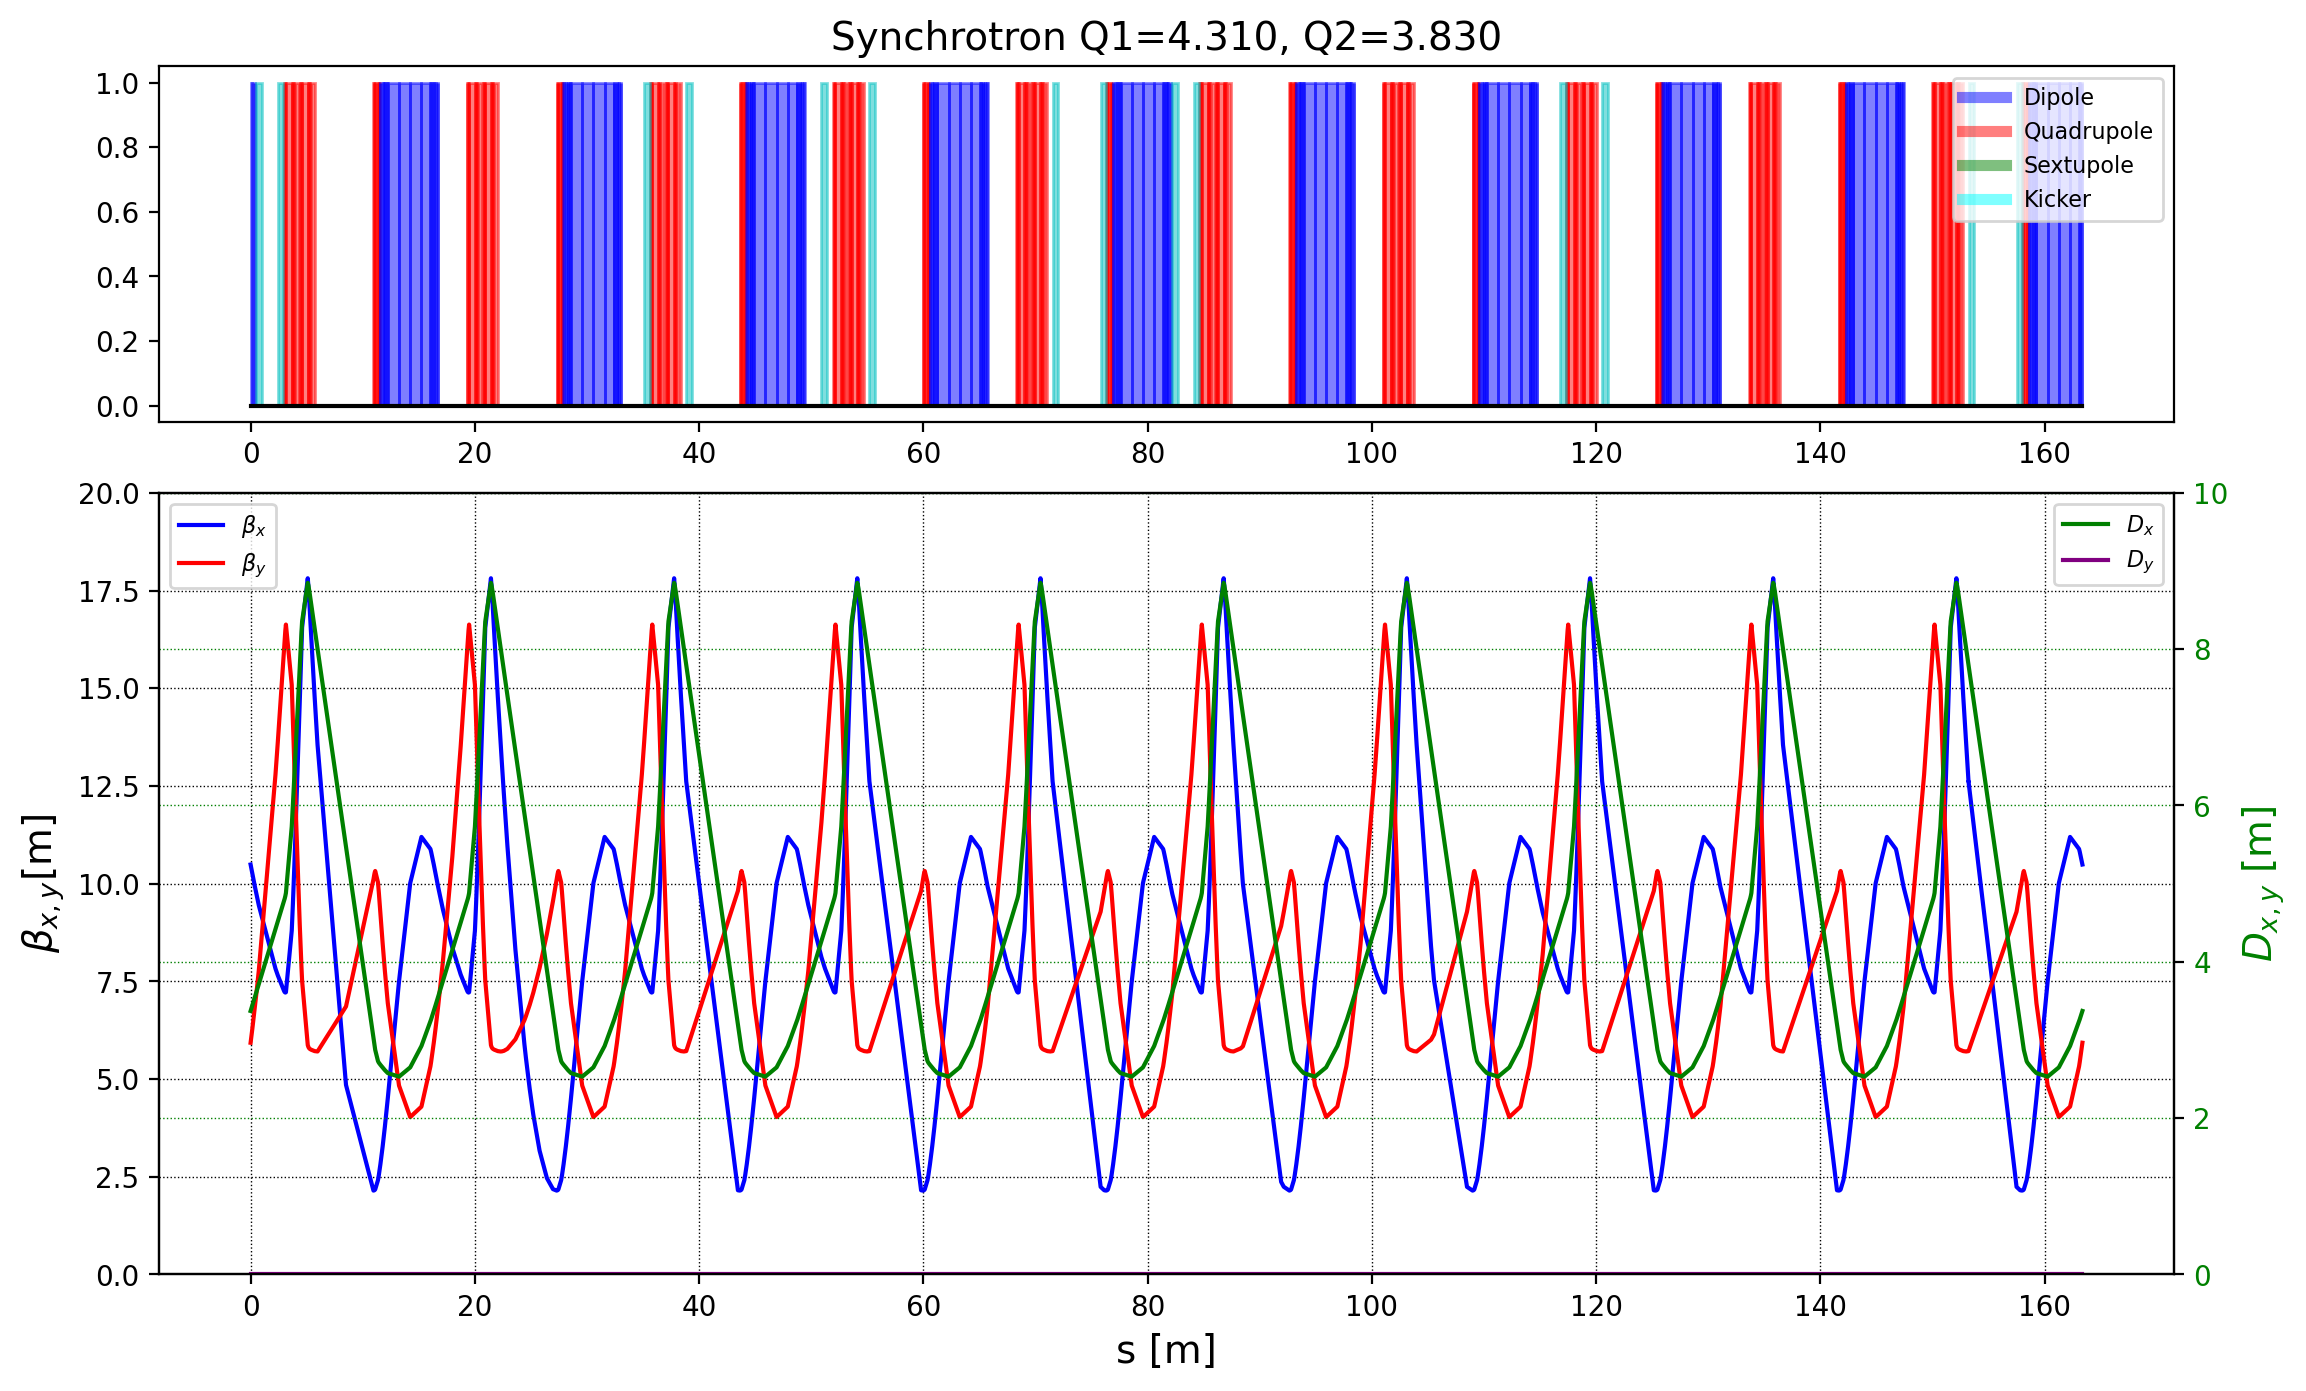

In [20]:
ring_twiss_file = 'synchrotron.tfs'
madx_twiss_ring = cpymad_madx_twiss(madx, cpymad_logfile, 'synchrotron', file_out=str(save_folder+ring_twiss_file))
cpymad_plot_madx_twiss_block(madx, madx_twiss_ring, 'Synchrotron', str(save_folder+'madx_ring_corr_twiss.png'))

## Plot machine survey

In [21]:
madx.survey()
mySurvey=madx.table.survey.dframe()

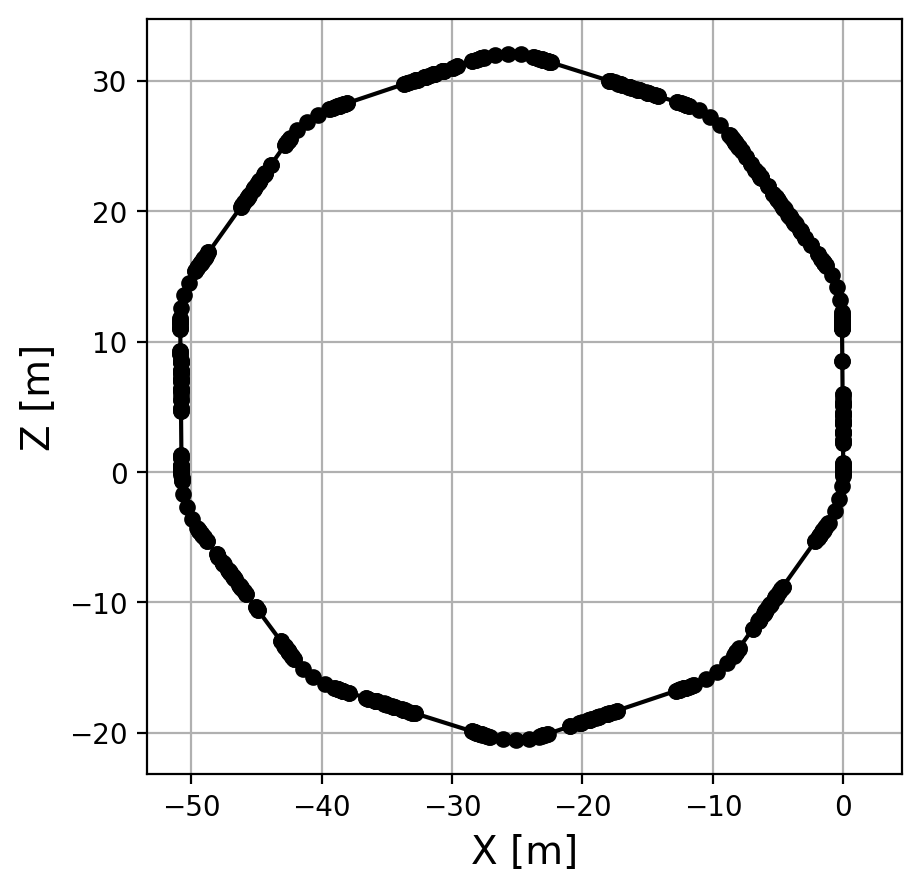

In [22]:
plt.plot(mySurvey.x,mySurvey.z,'o-k')
plt.axis('square');
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.grid()

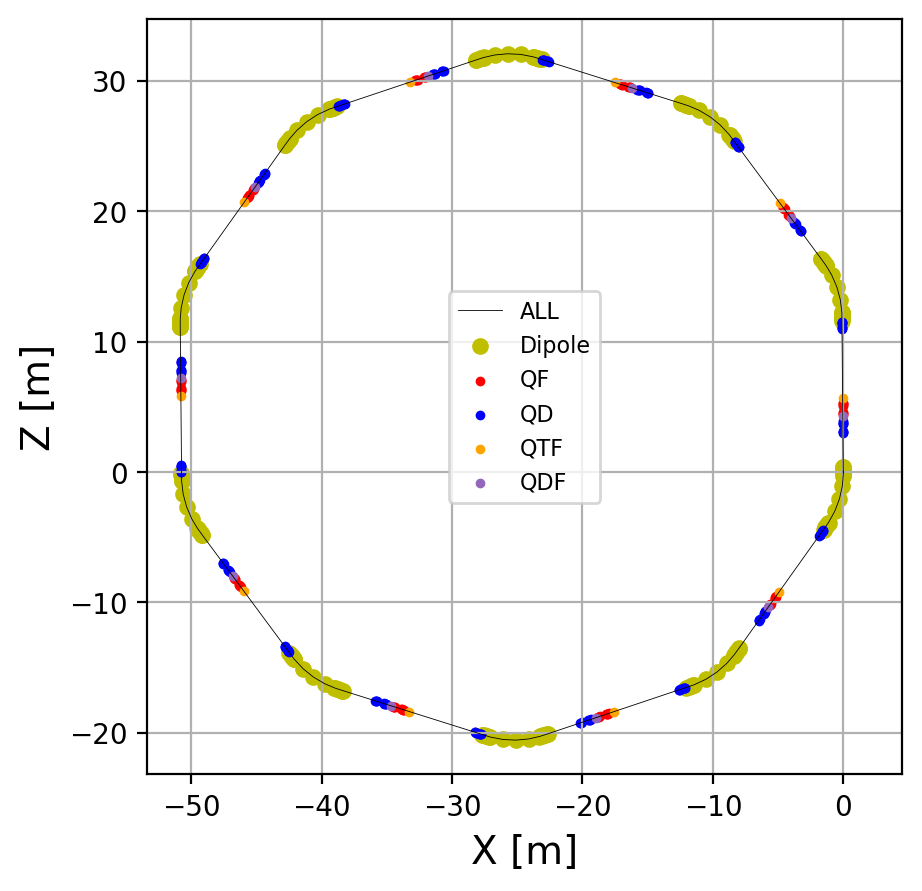

In [23]:
# Plot quads and sbends only
qfSurvey=mySurvey[mySurvey['name'].str.contains('qf')]
qtfSurvey=mySurvey[mySurvey['name'].str.contains('qtf')]
qdSurvey=mySurvey[mySurvey['name'].str.contains('qd')]
qtdSurvey=mySurvey[mySurvey['name'].str.contains('qtd')]
mbSurvey=mySurvey[mySurvey['name'].str.contains('dip')]

plt.plot(mySurvey.x,mySurvey.z,'-k', lw=0.3, label='ALL')
plt.scatter(mbSurvey.x,mbSurvey.z, marker='o', color='y', label='Dipole')
mtype='.'
plt.scatter(qfSurvey.x,qfSurvey.z, marker=mtype, color='r', label='QF')
plt.scatter(qdSurvey.x,qdSurvey.z, marker=mtype, color='b', label='QD')
plt.scatter(qtfSurvey.x,qtfSurvey.z, marker=mtype, color='orange', label='QTF')
plt.scatter(qtdSurvey.x,qtdSurvey.z, marker=mtype, color='tab:purple', label='QDF')

plt.legend()

# Custom legend
#legend_elements = [Line2D([0], [0], color='y', label='Dipole'), Line2D([0], [0], color='g', label='QD'), Line2D([0], [0], color='b', label='QF')]
#plt.legend(handles=legend_elements, loc=1)

plt.axis('square');
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.grid()

# Check Tunes using MAD-X Tracking 

In [24]:
myString='''
TRACK;
START, X=0.0001, PX=0, Y=0, PY=0, T=0, PT=0;
START, Y=0.0001, PX=0, X=0, PY=0, T=0, PT=0;
RUN, TURNS=1023;
ENDTRACK;
'''
madx.input(myString)

True

In [25]:
list(madx.table)

['summ',
 'twiss',
 'errors_dipole',
 'errors_field',
 'errors_total',
 'nonlin',
 'ptc_twiss',
 'ptc_twiss_summary',
 'survey',
 'tracksumm',
 'track.obs0001.p0001',
 'track.obs0001.p0002']

In [26]:
myParticle=madx.table['track.obs0001.p0001'].dframe()
myParticle.head()

,number,turn,x,px,y,py,t,pt,s,e
#e,1.0,0.0,0.000100,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,1.008712
#e,1.0,1.0,0.000031,-0.000014,1.863457e-06,-1.359113e-06,-0.000015,0.0,0.0,1.008712
#e,1.0,2.0,-0.000124,0.000010,1.059505e-06,-1.780164e-07,0.000137,0.0,0.0,1.008712
#e,1.0,3.0,0.000061,0.000006,7.199800e-06,2.918207e-06,0.000037,0.0,0.0,1.008712
#e,1.0,4.0,0.000077,-0.000015,4.224753e-07,5.347581e-07,-0.000040,0.0,0.0,1.008712


array([0.31182796, 0.68914956])

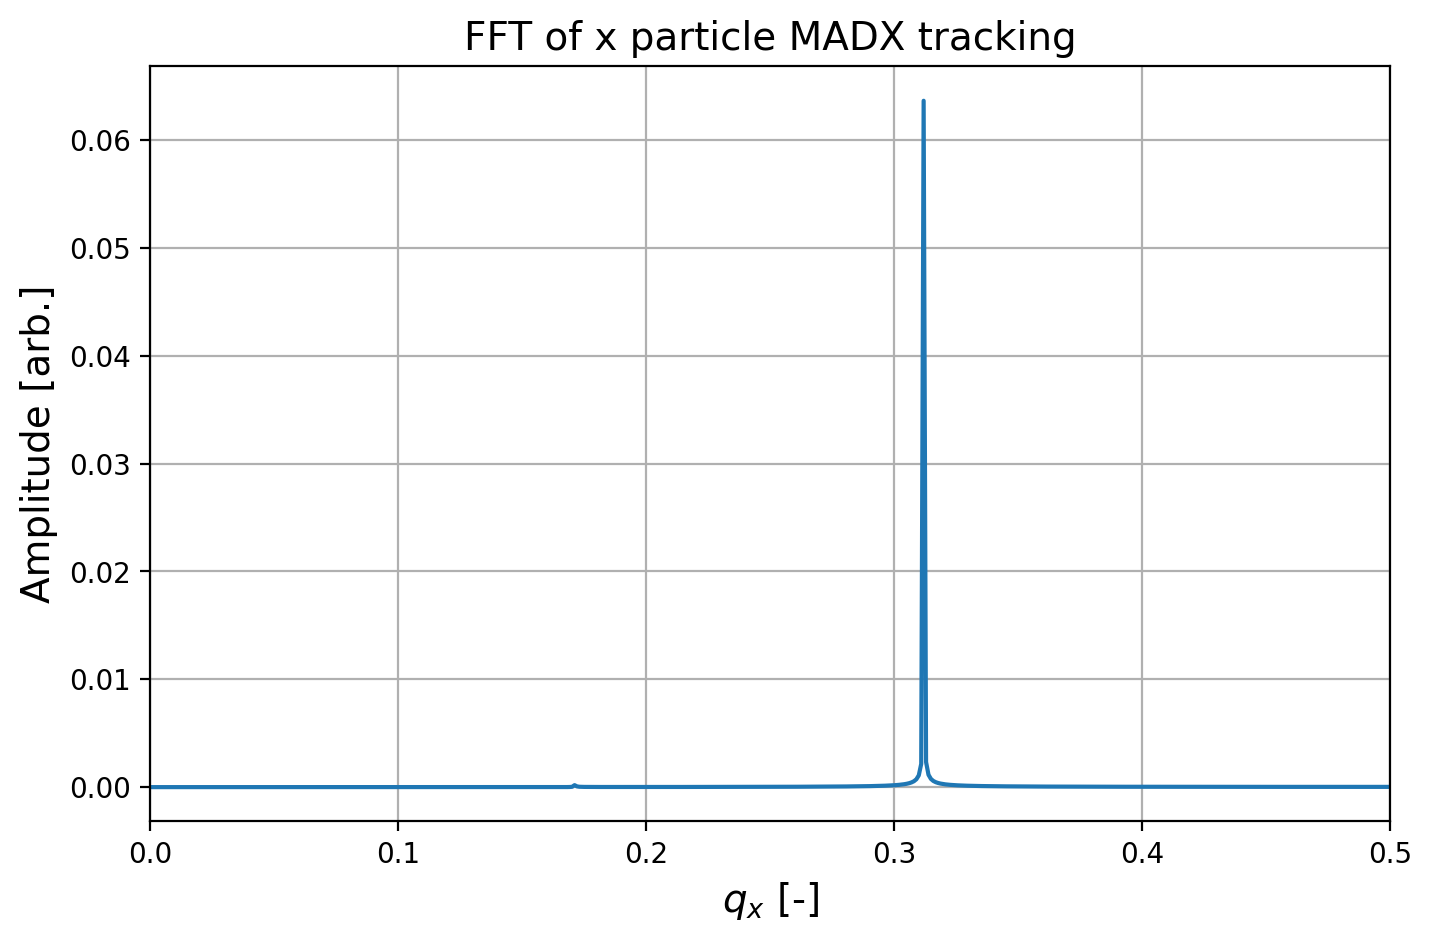

In [27]:
myAmplitude=np.abs(np.fft.fft(myParticle['x']));
myTunes=np.linspace(0,1,1024)
plt.plot(myTunes,myAmplitude)
plt.xlim([0,0.5])
plt.title('FFT of x particle MADX tracking')
plt.xlabel(r'$q_x$ [-]')
plt.ylabel('Amplitude [arb.]')
plt.grid()
myTunes[myAmplitude==np.max(myAmplitude)]

In [28]:
myParticle2=madx.table['track.obs0001.p0002'].dframe()
myParticle2.head()

,number,turn,x,px,y,py,t,pt,s,e
#e,2.0,0.0,0.000000e+00,0.000000e+00,0.000100,0.000000,0.000000,0.0,0.0,1.008712
#e,2.0,1.0,-2.163323e-05,1.210027e-06,0.000145,0.000033,0.000012,0.0,0.0,1.008712
#e,2.0,2.0,-1.743725e-08,3.269454e-07,0.000038,0.000032,-0.000001,0.0,0.0,1.008712
#e,2.0,3.0,2.009100e-05,-2.846806e-06,-0.000108,-0.000003,-0.000020,0.0,0.0,1.008712
#e,2.0,4.0,-2.807587e-07,-7.410405e-07,-0.000142,-0.000035,-0.000002,0.0,0.0,1.008712


array([0.82991202])

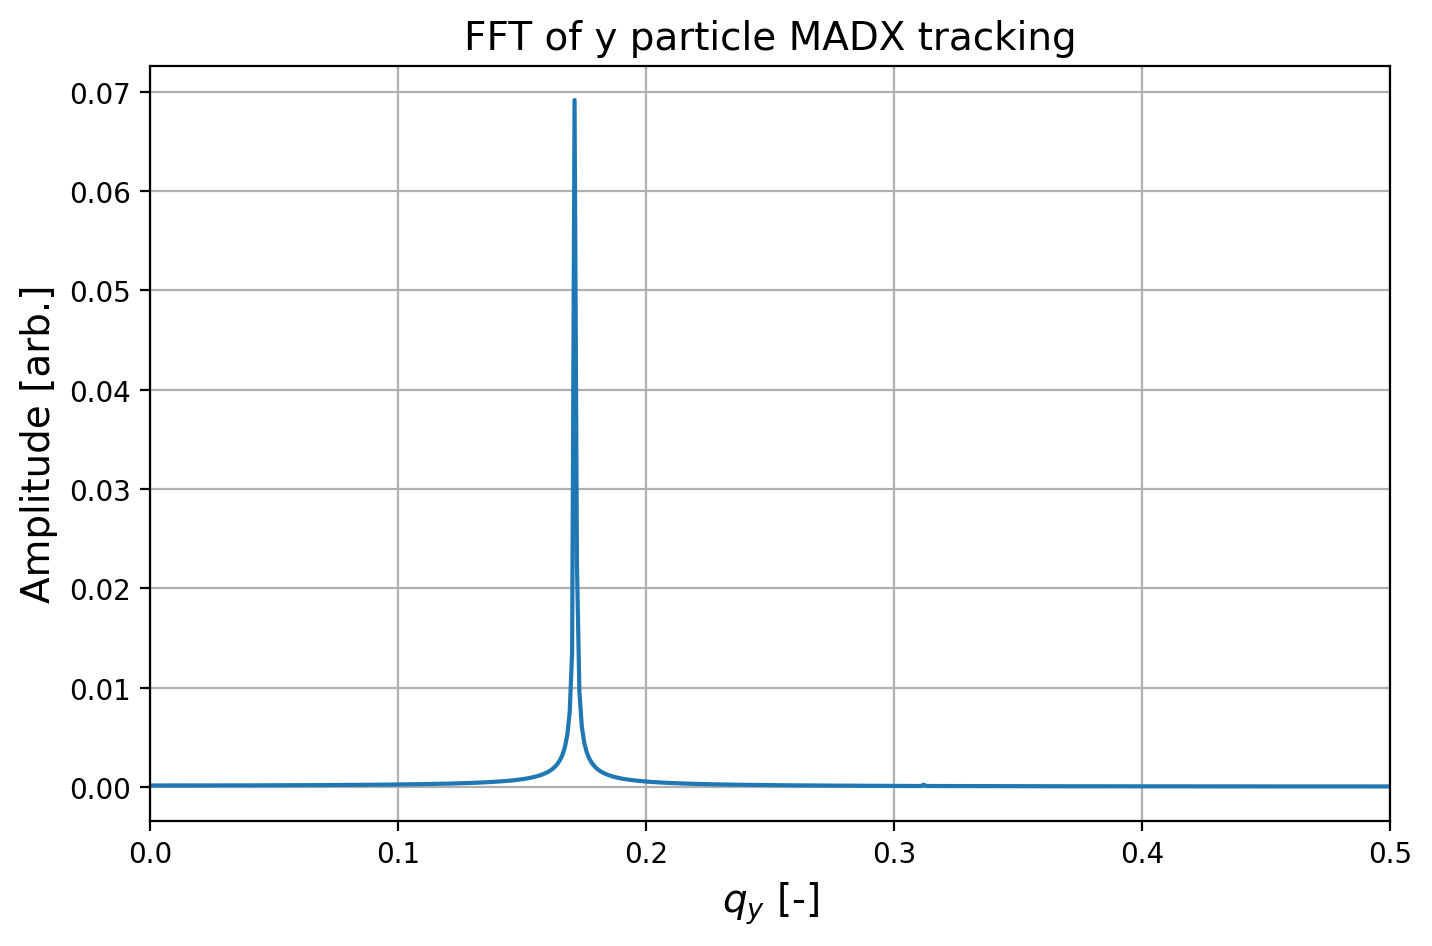

In [29]:
myAmplitude2=np.abs(np.fft.fft(myParticle2['y']));
myTunes2=np.linspace(0,1,1024)
plt.plot(myTunes2,myAmplitude2)
plt.xlim([0,0.5])
plt.title('FFT of y particle MADX tracking')
plt.xlabel(r'$q_y$ [-]')
plt.ylabel('Amplitude [arb.]')
plt.grid()
myTunes2[myAmplitude2==np.max(myAmplitude2)]

In [30]:
madx_summary_dframe=madx.table['summ'].dframe()
ptc_summary_dframe=madx.table['ptc_twiss_summary'].dframe()

## Check tunes using PTC tracking

    propagation_method = 2; 
    order_of_integrator = 6;
    exact_flag = true;
    time_flag = false;
    integration_steps_per_element = 5; ! 3;
    map_order = 5;

    ptc_create_universe;
    ptc_create_layout, time=false, model=propagation_method, method=order_of_integrator, nst=integration_steps_per_element, exact=true;


In [31]:
myString='''
ptc_create_universe;
ptc_create_layout, time=false, model=2, method=6, nst=5, exact=true;
ptc_start, x=0.0001, px=0.0, y=0.0, py=0.0, t=0.0, pt=0.0;
ptc_track, icase=6, closed_orbit, dump, onetable, turns=1023, file=ptc_x_track;
ptc_track_end;
ptc_end;
'''
madx.input(myString)

True

In [32]:
list(madx.table)

['summ',
 'twiss',
 'errors_dipole',
 'errors_field',
 'errors_total',
 'nonlin',
 'ptc_twiss',
 'ptc_twiss_summary',
 'survey',
 'tracksumm',
 'trackone']

In [33]:
myPTCParticle=madx.table['trackone'].dframe()

In [34]:
myPTCParticle

,number,turn,x,px,y,py,t,pt,s,e
#e,1.0,0.0,0.000100,0.000000e+00,0.0,0.0,-0.000000,0.0,0.00000,1.008712
#e,1.0,1.0,0.000033,-1.383864e-05,0.0,0.0,-0.000006,0.0,163.36282,1.008712
#e,1.0,2.0,-0.000124,1.020552e-05,0.0,0.0,0.000050,0.0,163.36282,1.008712
#e,1.0,3.0,0.000059,6.311825e-06,0.0,0.0,0.000015,0.0,163.36282,1.008712
#e,1.0,4.0,0.000081,-1.486094e-05,0.0,0.0,-0.000015,0.0,163.36282,1.008712
...,...,...,...,...,...,...,...,...,...,...
#e,1.0,1019.0,0.000099,1.169773e-07,0.0,0.0,-0.000023,0.0,163.36282,1.008712
#e,1.0,1020.0,0.000034,-1.388134e-05,0.0,0.0,-0.000029,0.0,163.36282,1.008712
#e,1.0,1021.0,-0.000124,1.012003e-05,0.0,0.0,0.000027,0.0,163.36282,1.008712
#e,1.0,1022.0,0.000058,6.417569e-06,0.0,0.0,-0.000008,0.0,163.36282,1.008712


array([0.31085044])

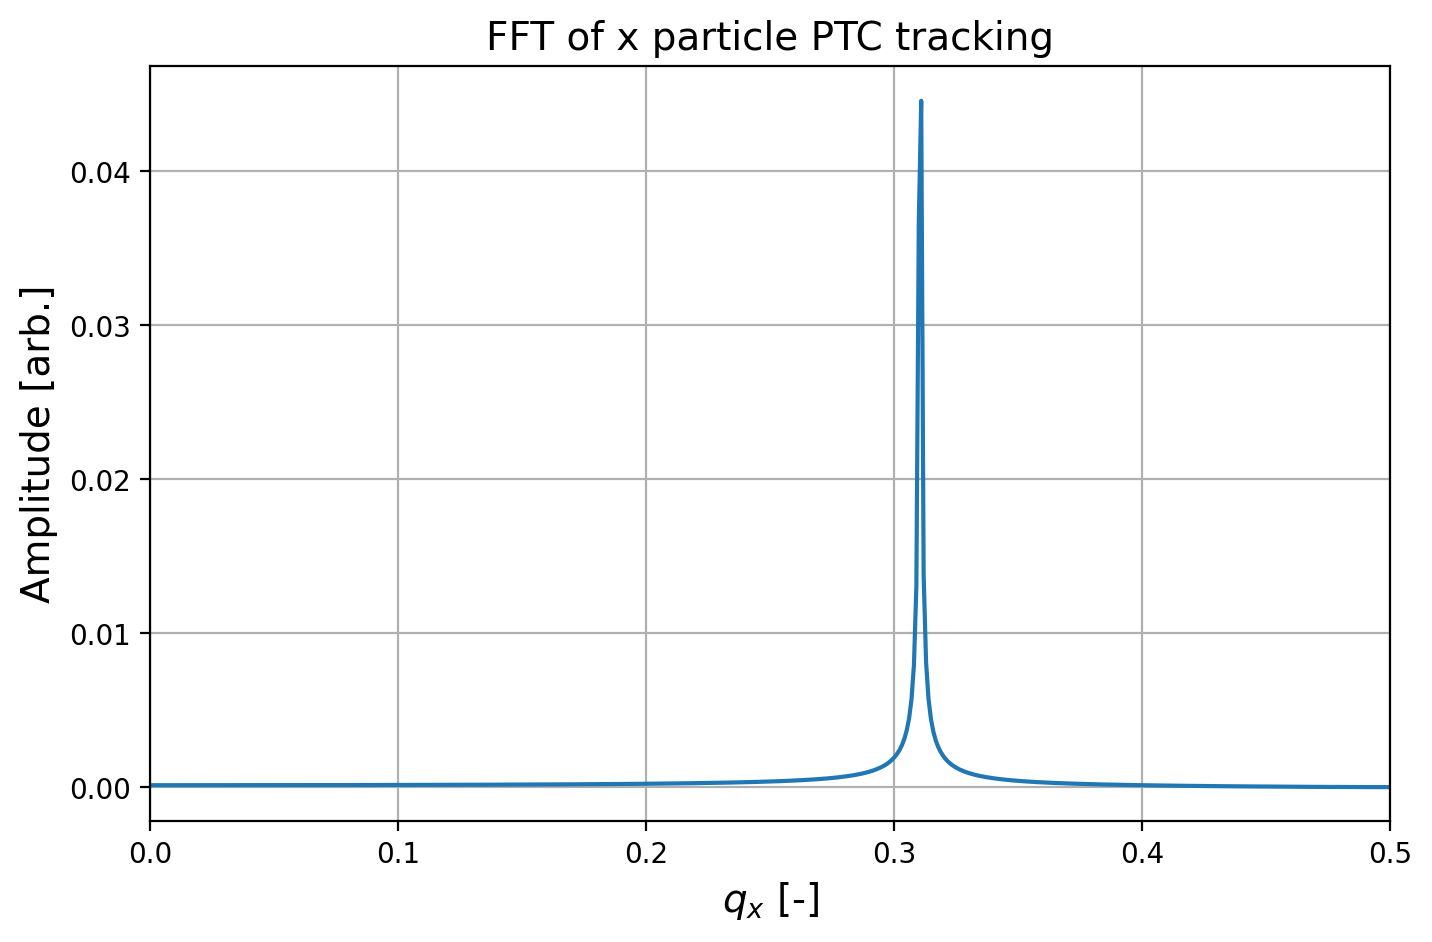

In [35]:
myAmplitudePTC=np.abs(np.fft.fft(myPTCParticle['x']));
myTunesPTC=np.linspace(0,1,1024)
plt.plot(myTunesPTC,myAmplitudePTC)
plt.xlim([0,0.5])
plt.title('FFT of x particle PTC tracking')
plt.xlabel(r'$q_x$ [-]')
plt.ylabel('Amplitude [arb.]')
plt.grid()
myTunesPTC[myAmplitudePTC==np.max(myAmplitudePTC)]

In [36]:
myString='''
ptc_create_universe;
ptc_create_layout, time=false, model=2, method=6, nst=5, exact=true;
ptc_start, y=0.0001, px=0.0, x=0.0, py=0.0, t=0.0, pt=0.0;
ptc_track, icase=6, closed_orbit, dump, onetable, turns=1023, file=ptc_y_track;
ptc_track_end;
ptc_end;
'''
madx.input(myString)

True

In [37]:
list(madx.table)

['summ',
 'twiss',
 'errors_dipole',
 'errors_field',
 'errors_total',
 'nonlin',
 'ptc_twiss',
 'ptc_twiss_summary',
 'survey',
 'tracksumm',
 'trackone']

In [38]:
myPTCParticle2=madx.table['trackone'].dframe()

array([0.17008798, 0.83088954])

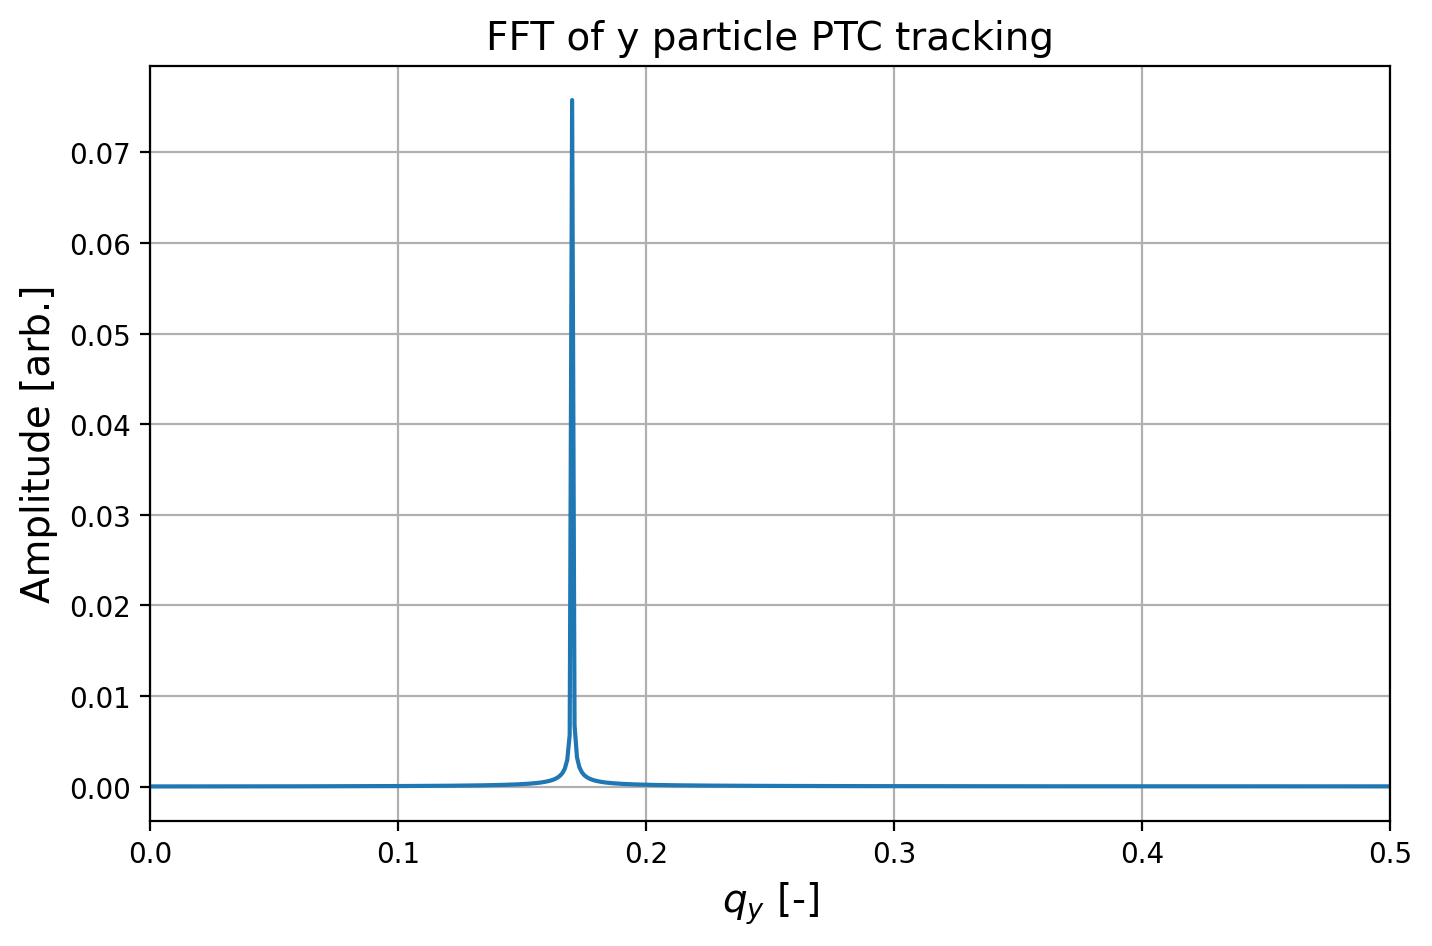

In [39]:
myAmplitudePTC2=np.abs(np.fft.fft(myPTCParticle2['y']));
myTunesPTC2=np.linspace(0,1,1024)
plt.plot(myTunesPTC2,myAmplitudePTC2)
plt.xlim([0,0.5])
plt.title('FFT of y particle PTC tracking')
plt.xlabel(r'$q_y$ [-]')
plt.ylabel('Amplitude [arb.]')
plt.grid()

myTunesPTC2[myAmplitudePTC2==np.max(myAmplitudePTC2)]

### Note how MAD-X returns the full tune $Q_x$, wheras PTC (and the FFT of course) returns only the fractional tune $q_x$

In [40]:
print('MADX: Qx = \t\t\t', round_sig(madx.table.summ.Q1[0]))
print('MADX Tracked Particle qx = \t', round_sig(myTunes[myAmplitude==np.max(myAmplitude)][0]))
print('\nPTC: qx = \t\t\t', round_sig(madx.table.ptc_twiss_summary.Q1[0]))
print('PTC Tracked Particle qx = \t', round_sig(myTunesPTC[myAmplitudePTC==np.max(myAmplitudePTC)][0]))
print('\nMADX: Qy = \t\t\t', round_sig(madx.table.summ.Q2[0]))
print('MADX Tracked Particle qy = \t', round_sig(myTunes2[myAmplitude2==np.max(myAmplitude2)][0]))
print('\nPTC: qy = \t\t\t', round_sig(madx.table.ptc_twiss_summary.Q2[0]))
print('PTC Tracked Particle qy = \t', round_sig(1.-myTunesPTC2[myAmplitudePTC2==np.max(myAmplitudePTC2)][0]))

MADX: Qx = 			 4.31
MADX Tracked Particle qx = 	 0.312

PTC: qx = 			 0.31
PTC Tracked Particle qx = 	 0.311

MADX: Qy = 			 3.83
MADX Tracked Particle qy = 	 0.83

PTC: qy = 			 0.83
PTC Tracked Particle qy = 	 0.83
